# Défi AIF - code statistiques descriptives

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dusse\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Chargement des données

In [2]:
requests=pd.read_csv("laulau_data.csv",sep=",",header=0)
features_hotel=pd.read_csv("features_hotels.csv",sep=",",header=0)

In [3]:
requests

,Unnamed: 0,index,hotel_id,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
0,0,519,519,Yin Yang,Royal Lotus,copenhagen,0,0,0,208,68,30,french,0,laulau
1,1,523,523,Independant,Independant,copenhagen,0,0,0,85,41,30,french,0,laulau
2,2,898,898,Yin Yang,8 Premium,copenhagen,1,0,0,86,24,30,french,0,laulau
3,3,770,770,Morriott International,Morriot,copenhagen,1,1,0,210,73,30,french,0,laulau
4,4,562,562,Chillton Worldwide,Quadrupletree,copenhagen,0,0,0,215,74,30,french,0,laulau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,88,498,498,Boss Western,Boss Western,vilnius,0,0,0,94,40,30,czech,1,laulau
936,89,516,516,Morriott International,Corlton,vilnius,1,0,2,195,117,30,czech,1,laulau
937,90,187,187,Accar Hotels,Marcure,vilnius,1,1,0,137,86,30,czech,1,laulau
938,91,687,687,Chillton Worldwide,Tripletree,vilnius,0,0,0,110,52,30,czech,1,laulau


## Some descriptive statistics

### Study of the variable "parking"

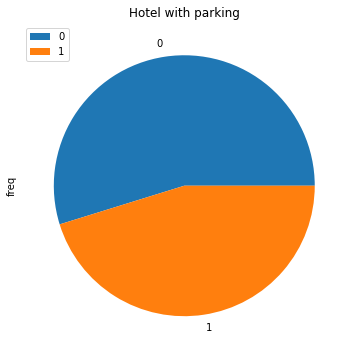

In [4]:
t = pd.crosstab(requests["parking"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with parking")
plt.show()

### Study of the variable "pool"

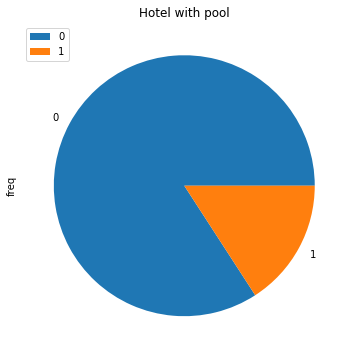

In [5]:
t = pd.crosstab(requests["pool"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with pool")
plt.show()

### Study of the variable "children policy"

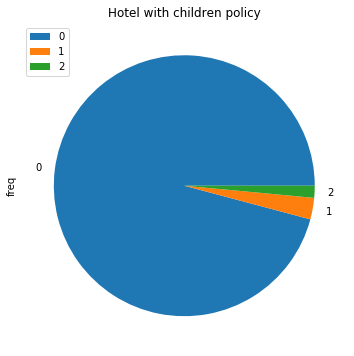

In [6]:
t = pd.crosstab(requests["children_policy"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with children policy")
plt.show()

### Study of the hotel price

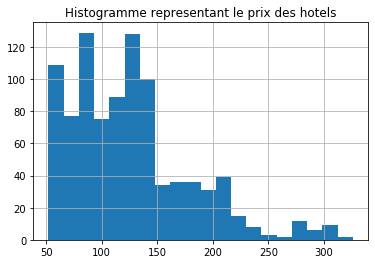

In [7]:
requests["price"].hist(bins=20)
plt.title("Histogramme representant le prix des hotels")
plt.show()

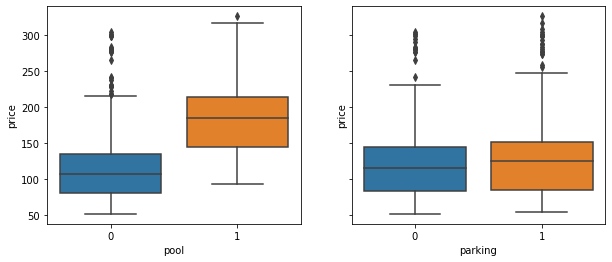

In [44]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.boxplot(x='pool', y='price', data=requests,ax=axes[0])
sns.boxplot(x='parking', y='price', data=requests,ax=axes[1])

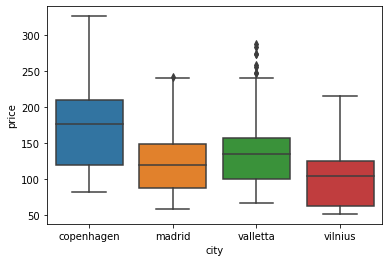

In [8]:
sns.boxplot(x='city', y='price', data=requests)